# Feature Engineering and Polynomial Regression

In [1]:
import numpy as np
import math,copy
import matplotlib.pyplot as plt

# Polynomial Features

We were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: $y = 1+x^2$

In [2]:
x=np.arange(0,20,1)
y=1+x**2
X=x.reshape(-1,1)
print(f"X.shape={X.shape}")

X.shape=(20, 1)


Here instead of using the values of y we are using it as a function of x

We are using our previous code for the running of Gradient Descent

In [3]:
def compute_cost(w,b,x,y):
    m=x.shape[0]
    cost_sum=0
    for i in range(m):
        f_wb=np.dot(w,x[i])+b
        cost_sum=cost_sum+(f_wb-y[i])**2
    final_cost=cost_sum/(2*m)
    return final_cost

In [4]:
def compute_gradient(w,b,x,y):
    m,n = x.shape              #(number of examples, number of features)
    dj_db=0
    dj_dw=np.zeros((n,))
    for i in range(m):
        f_wb=np.dot(w,x[i])+b
        err=(f_wb-y[i])
        for j in range(n):
            dj_dw[j]=dj_dw[j]+ err*x[i,j]
        dj_db=dj_db+err  
        
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db

In [5]:
def gradient_descent(w,b,x,y,num_of_iters,alpha):
    j_history=[]
    for i in range(num_of_iters):
        dj_dw,dj_db=compute_gradient(w,b,x,y)
        b=b-alpha*dj_db
        w=w-alpha*dj_dw
        
        if (i<100000):
            j_history.append(compute_cost(w,b,x,y))
            
            
        if i%math.ceil(num_of_iters/10)==0:
            print(f"cost: {j_history[-1]} w={w} and b={b}")
    
    return w,b

In [6]:
w=0
b=0
model_w,model_b=gradient_descent(w,b,X,y,1000,1e-2)
print(f"\nw,b found by gradient descent are w={model_w} and b={model_b} ")

cost: [1657.56329375] w=[18.145] and b=[1.245]
cost: [694.54910671] w=[15.64052925] and b=[-12.4215267]
cost: [588.4754483] w=[16.43032097] and b=[-22.6665682]
cost: [526.41376065] w=[17.03443732] and b=[-30.50306099]
cost: [490.10264315] w=[17.49652949] and b=[-36.49724065]
cost: [468.85769632] w=[17.84998652] and b=[-41.0822241]
cost: [456.42768048] w=[18.12034789] and b=[-44.58930504]
cost: [449.15511373] w=[18.3271489] and b=[-47.27189198]
cost: [444.90007273] w=[18.48533222] and b=[-49.32381859]
cost: [442.41052887] w=[18.60632757] and b=[-50.89334938]

w,b found by gradient descent are w=[18.69806954] and b=[-52.08341025] 


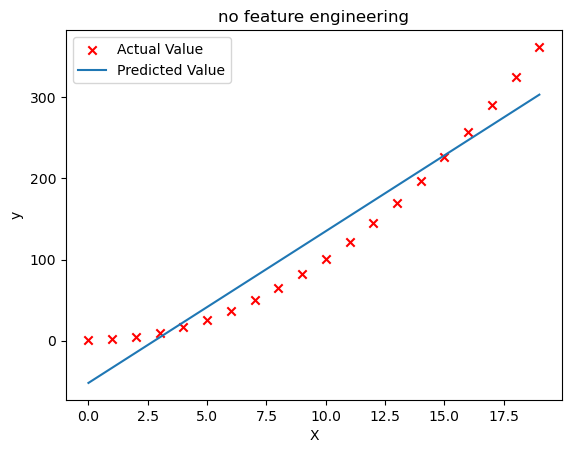

In [7]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("no feature engineering")
plt.plot(x,np.dot(X,model_w) + model_b, label="Predicted Value");  
plt.xlabel("X"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

Thus we see that a linear curve doesnot fit the data as required and hence we perform the techniques of feature engineering, featre scaling and polynomial regresssion

Well, as expected, not a great fit. What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.
To accomplish this, you can modify the *input data* to *engineer* the needed features. If you swap the original data with a version that squares the $x$ value, then you can achieve $y= w_0x_0^2 + b$. Let's try it. Swap `X` for `X**2` below:

In [8]:
x=np.arange(0,20,1)
y=1+x**2
X=x**2
# We are using a polynomial feature
X=X.reshape(-1,1)
print(f"X.sahpe={X.shape}")

X.sahpe=(20, 1)


In [9]:
model_w,model_b=gradient_descent(w,b,X,y,10000,1e-5)
print(f"\nw,b found by gradient descent are w={model_w} and b={model_b} ")

cost: [7329.21807512] w=[0.282568] and b=[0.001245]
cost: [0.22484418] w=[1.00435055] and b=[0.0089615]
cost: [0.22279468] w=[1.00433067] and b=[0.0134886]
cost: [0.22076386] w=[1.00431089] and b=[0.01799502]
cost: [0.21875155] w=[1.0042912] and b=[0.02248085]
cost: [0.21675759] w=[1.0042716] and b=[0.02694619]
cost: [0.2147818] w=[1.00425208] and b=[0.03139114]
cost: [0.21282402] w=[1.00423266] and b=[0.03581578]
cost: [0.21088408] w=[1.00421332] and b=[0.0402202]
cost: [0.20896183] w=[1.00419408] and b=[0.04460451]

w,b found by gradient descent are w=[1.00417494] and b=[0.04896444] 


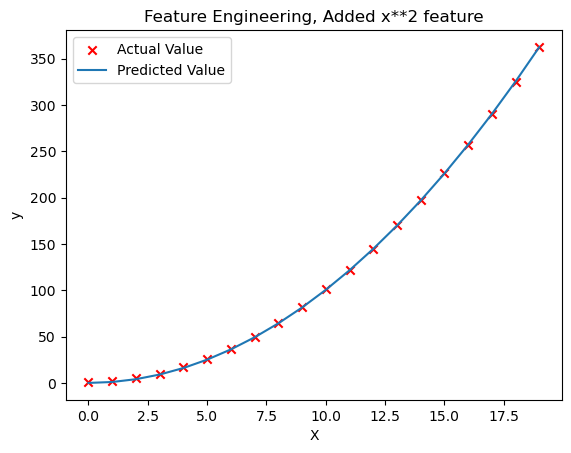

In [10]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Feature Engineering, Added x**2 feature")
plt.plot(x,np.dot(X,model_w) + model_b, label="Predicted Value");  
plt.xlabel("X"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

Great! near perfect fit. Notice the values of $\mathbf{w}$ and b printed right above the graph: `w,b found by gradient descent: w: [1.], b: 0.0490`. Gradient descent modified our initial values of $\mathbf{w},b $ to be (1.0,0.049) or a model of $y=1*x_0^2+0.049$, very close to our target of $y=1*x_0^2+1$. If you ran it longer, it could be a better match.

# Selecting Features




<a name='GDF'></a>
Above, we knew that an $x^2$ term was required. It may not always be obvious which features are required. One could add a variety of potential features to try and find the most useful. For example, what if we had instead tried : $y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ? 

In [11]:
x=np.arange(0,20,1)
y=x**2
print(y)
# Adding engineered features
X=np.c_[x,x**2,x**3]
# np.c_[a,b,c] will be use to stack them horizntally 
print(X)

[  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289
 324 361]
[[   0    0    0]
 [   1    1    1]
 [   2    4    8]
 [   3    9   27]
 [   4   16   64]
 [   5   25  125]
 [   6   36  216]
 [   7   49  343]
 [   8   64  512]
 [   9   81  729]
 [  10  100 1000]
 [  11  121 1331]
 [  12  144 1728]
 [  13  169 2197]
 [  14  196 2744]
 [  15  225 3375]
 [  16  256 4096]
 [  17  289 4913]
 [  18  324 5832]
 [  19  361 6859]]


In [12]:
w=np.zeros(X.shape[1])
print(w.shape)
print(w)
b=0
model_w,model_b = gradient_descent(w,b,X, y,10000, 1e-7)
print(f"\nw,b found by gradient descent are w={model_w} and b={model_b} ")

(3,)
[0. 0. 0.]
cost: 1140.292403958814 w=[0.0001805  0.00281333 0.0456665 ] and b=1.2349999999999999e-05
cost: 328.53949237943016 w=[0.01167144 0.07767216 0.0552169 ] and b=0.001486316056481097
cost: 280.44342049740857 w=[0.0222387  0.14605831 0.05108028] and b=0.0028444779723460004
cost: 239.388632459792 w=[0.0320004  0.20924082 0.04725843] and b=0.0040987184368103955
cost: 204.34428145129408 w=[0.04101784 0.26761565 0.0437274 ] and b=0.00525694548278895
cost: 174.43043704918426 w=[0.04934766 0.32154866 0.04046505] and b=0.006326465377759927
cost: 148.89599100210643 w=[0.05704218 0.37137785 0.03745095] and b=0.0073140284153846566
cost: 127.09979761185204 w=[0.06414975 0.41741549 0.03466619] and b=0.008225871222592386
cost: 108.4945751709078 w=[0.07071503 0.45995011 0.03209334] and b=0.009067755847288148
cost: 92.61316423608045 w=[0.07677928 0.49924828 0.02971626] and b=0.009845005871663159

w,b found by gradient descent are w=[0.08237526 0.53552137 0.02752216] and b=0.010561850529563

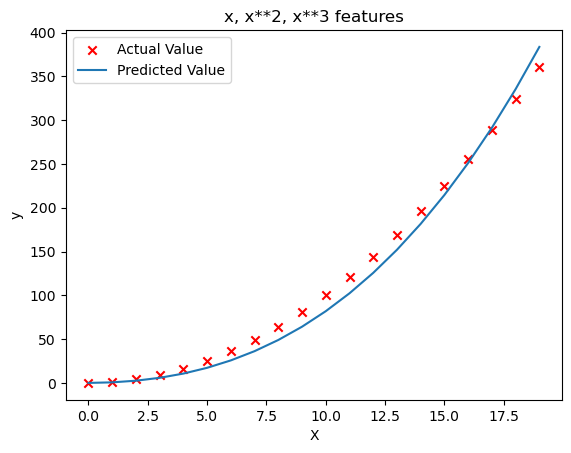

In [13]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("x, x**2, x**3 features")
plt.plot(x,np.dot(X,model_w) + model_b, label="Predicted Value");  
plt.xlabel("X"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

Note the value of $\mathbf{w}$, `[0.08 0.54 0.03]` and b is `0.0106`.This implies the model after fitting/training is:
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.0106 $$
Gradient descent has emphasized the data that is the best fit to the $x^2$ data by increasing the $w_1$ term relative to the others.  If you were to run for a very long time, it would continue to reduce the impact of the other terms. 
>Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter

Let's review this idea:
- Intially, the features were re-scaled so they are comparable to each other
- less weight value implies less important/correct feature, and in extreme, when the weight becomes zero or very close to zero, the associated feature is not useful in fitting the model to the data.
- above, after fitting, the weight associated with the $x^2$ feature is much larger than the weights for $x$ or $x^3$ as it is the most useful in fitting the data.

# Scaling Feature

As described in the last lab, if the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. In the example above, there is $x$, $x^2$ and $x^3$ which will naturally have very different scales. Let's apply Z-score normalization to our example.

In [14]:
x=np.arange(0,20,1)
X=np.c_[x,x**2,x**3]
print(f"peak to peak value before normalization {np.ptp(X,axis=0)}")

peak to peak value before normalization [  19  361 6859]


**Z-Score Normalization**

In [15]:
def Z_score_normalization(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    
    return X_norm

In [16]:
X_norm=Z_score_normalization(X)
print(f"peak to peak value after normalization {np.ptp(X_norm,axis=0)}")

peak to peak value after normalization [3.29501788 3.18076489 3.28307153]


Thus normalization helps to run the gradient descent much faster and efficient

In [17]:
x=np.arange(0,20,1)
X=np.c_[x,x**2,x**3]
y=x**2
X=Z_score_normalization(X)
model_w, model_b = gradient_descent(w,b,X, y,100000, 1e-1)
print(f"\nw,b found by gradient descent are w={model_w} and b={model_b} ")

cost: 9421.466803006972 w=[10.95593446 11.34947135 11.18836218] and b=12.350000000000001
cost: 0.3909383821637206 w=[ 7.67347995 93.94884021 12.28706629] and b=123.49999999999994
cost: 0.02783887263610958 w=[  2.04768915 108.27884368   3.27883731] and b=123.49999999999994
cost: 0.0019824168334675444 w=[  0.54643146 112.10284437   0.87496672] and b=123.49999999999994
cost: 0.00014116866559152975 w=[  0.14581673 113.12328943   0.23348727] and b=123.49999999999994
cost: 1.0052675001869057e-05 w=[3.89115946e-02 1.13395598e+02 6.23067168e-02] and b=123.49999999999994
cost: 7.158548554009304e-07 w=[1.03836656e-02 1.13468264e+02 1.66267181e-02] and b=123.49999999999994
cost: 5.0976299730516404e-08 w=[2.77090962e-03 1.13487655e+02 4.43688528e-03] and b=123.49999999999994
cost: 3.6300419212882836e-09 w=[7.39424825e-04 1.13492830e+02 1.18399499e-03] and b=123.49999999999994
cost: 2.5849668204251643e-10 w=[1.97317541e-04 1.13494211e+02 3.15952308e-04] and b=123.49999999999994

w,b found by gradie

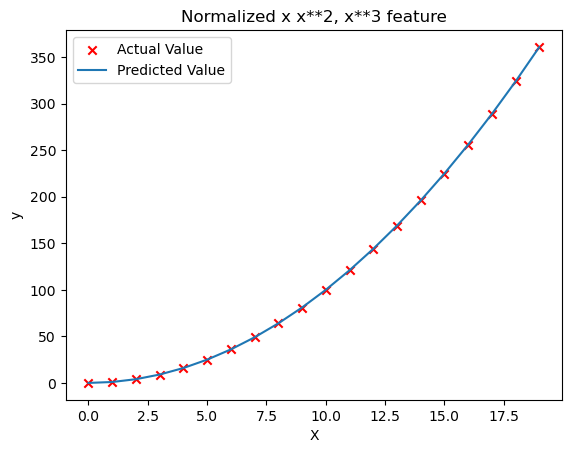

In [18]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,np.dot(X,model_w) + model_b, label="Predicted Value");  
plt.xlabel("X"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

Feature scaling allows this to converge much faster.   
Note again the values of $\mathbf{w}$. The $w_1$ term, which is the $x^2$ term is the most emphasized. Gradient descent has all but eliminated the $x^3$ term.

## Complex Functions
With feature engineering, even quite complex functions can be modeled:

In [19]:
x=np.arange(0,20,1)
y=np.cos(x/2)
X=np.c_[x,x**2,x**3,x**4,x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X=Z_score_normalization(X)
w=np.zeros(13)
b=0

model_w,model_b = gradient_descent(w,b,X, y, 1000000, 1e-1)
print(f"w={model_w} and b={model_b}")

cost: 0.2248870612802319 w=[-0.01651132 -0.01624216 -0.01990402 -0.02384872 -0.02705827 -0.02939877
 -0.03099232  0.03056862  0.00317771  0.01781393  0.02031447 -0.00037558
 -0.01166951] and b=-0.0007287194855839025
cost: 0.02310620198755709 w=[-4.33275118e+00  5.89996066e+00  6.20020126e+00 -3.32033486e+00
 -7.85318713e+00 -3.95491704e+00  6.95465467e+00  8.82869040e-02
  5.12716674e-03  1.93506487e-02  1.96935869e-02 -6.80654659e-02
  5.42170752e-02] and b=-0.007287194855839094
cost: 0.02310620198755709 w=[-3.85036247e+00  3.04267135e+00  1.04616634e+01 -2.73395371e+00
 -1.07701842e+01 -6.15757316e+00  9.61715636e+00  7.04937334e-02
  3.36868987e-03  2.53727914e-02  3.43641152e-02 -5.94136251e-02
  5.59148645e-02] and b=-0.007287194855839258
cost: 0.02310620198755709 w=[-3.41548338e+00  5.10920873e-01  1.41823692e+01 -2.22094328e+00
 -1.32750391e+01 -8.03450968e+00  1.18766568e+01  5.62170395e-02
  1.78759215e-03  3.12339912e-02  4.86543484e-02 -5.27265134e-02
  5.77077432e-02] and b

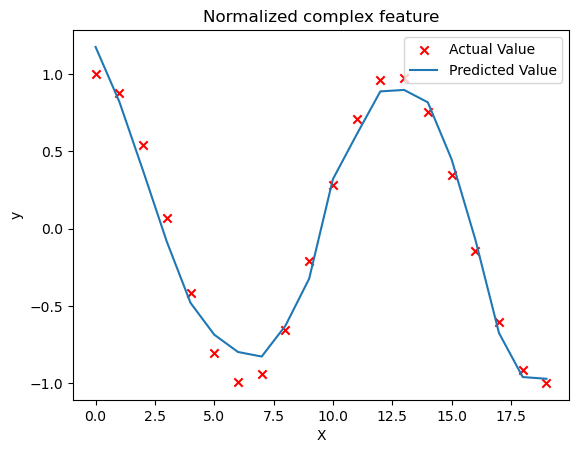

In [21]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Normalized complex feature")
plt.plot(x,np.dot(X,model_w) + model_b, label="Predicted Value");  
plt.xlabel("X"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()